In [6]:
import pandas as pd

In [14]:
datos = pd.read_csv("../data/datos_2020-05-17.csv",encoding = "latin-1")
datos.head()

,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,CARDIOVASCULAR,OBESIDAD,RENAL_CRONICA,TABAQUISMO,OTRO_CASO,RESULTADO,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2020-05-17,098894,2,3,2,2,2,2,2,1,...,1,2,2,2,1,1,99,MÃ©xico,99,97
1,2020-05-17,0cb732,2,4,9,2,9,15,31,2,...,2,1,2,2,99,1,99,MÃ©xico,99,2
2,2020-05-17,137359,2,4,2,1,1,2,2,1,...,2,1,2,2,99,1,99,MÃ©xico,99,97
3,2020-05-17,066f8f,2,4,30,1,21,30,193,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2
4,2020-05-17,027a23,2,4,9,2,21,9,15,2,...,2,2,2,1,99,1,99,MÃ©xico,99,2


In [15]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172294 entries, 0 to 172293
Data columns (total 35 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   FECHA_ACTUALIZACION  172294 non-null  object
 1   ID_REGISTRO          172294 non-null  object
 2   ORIGEN               172294 non-null  int64 
 3   SECTOR               172294 non-null  int64 
 4   ENTIDAD_UM           172294 non-null  int64 
 5   SEXO                 172294 non-null  int64 
 6   ENTIDAD_NAC          172294 non-null  int64 
 7   ENTIDAD_RES          172294 non-null  int64 
 8   MUNICIPIO_RES        172294 non-null  int64 
 9   TIPO_PACIENTE        172294 non-null  int64 
 10  FECHA_INGRESO        172294 non-null  object
 11  FECHA_SINTOMAS       172294 non-null  object
 12  FECHA_DEF            172294 non-null  object
 13  INTUBADO             172294 non-null  int64 
 14  NEUMONIA             172294 non-null  int64 
 15  EDAD                 172294 non-nu

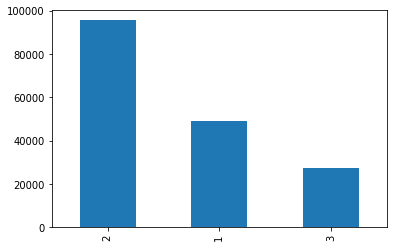

In [13]:
datos.RESULTADO.value_counts()

In [16]:
datos[["FECHA_ACTUALIZACION","RESULTADO"]].groupby("RESULTADO").count()

,FECHA_ACTUALIZACION
RESULTADO,
1,49219
2,95568
3,27507


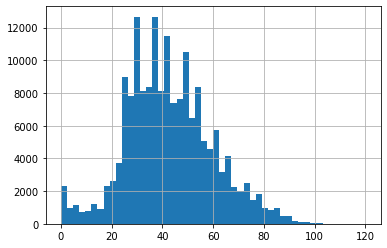

In [20]:
datos.EDAD.hist(bins = 50)

In [24]:
xl = pd.ExcelFile('../data/catalogo_2020-05-17.xlsx')
xl.sheet_names

['Catálogo ORIGEN',
 'Catálogo SECTOR',
 'Catálogo SEXO',
 'Catálogo TIPO_PACIENTE',
 'Catálogo SI_NO',
 'Catálogo NACIONALIDAD',
 'Catálogo RESULTADO',
 'Catálogo de ENTIDADES',
 'Catálogo MUNICIPIOS']

In [32]:
dict_catalogo = {}
for hoja in xl.sheet_names:
    if "Catálogo RESULTADO" == hoja:
        dict_catalogo[hoja] = pd.read_excel('../data/catalogo_2020-05-17.xlsx', sheet_name=hoja, skiprows=1)
    else:
        dict_catalogo[hoja] = pd.read_excel('../data/catalogo_2020-05-17.xlsx', sheet_name=hoja)
        print (hoja)            

Catálogo ORIGEN
Catálogo SECTOR
Catálogo SEXO
Catálogo TIPO_PACIENTE
Catálogo SI_NO
Catálogo NACIONALIDAD
Catálogo de ENTIDADES
Catálogo MUNICIPIOS


In [41]:
dict_catalogo['Catálogo RESULTADO']

,CLAVE,DESCRIPCIÓN
0,1,Positivo SARS-CoV-2
1,2,No positivo SARS-CoV-2
2,3,Resultado pendiente


In [36]:
datos.columns

Index(['FECHA_ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR', 'ENTIDAD_UM',
       'SEXO', 'ENTIDAD_NAC', 'ENTIDAD_RES', 'MUNICIPIO_RES', 'TIPO_PACIENTE',
       'FECHA_INGRESO', 'FECHA_SINTOMAS', 'FECHA_DEF', 'INTUBADO', 'NEUMONIA',
       'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA_LENGUA_INDIG', 'DIABETES',
       'EPOC', 'ASMA', 'INMUSUPR', 'HIPERTENSION', 'OTRA_COM',
       'CARDIOVASCULAR', 'OBESIDAD', 'RENAL_CRONICA', 'TABAQUISMO',
       'OTRO_CASO', 'RESULTADO', 'MIGRANTE', 'PAIS_NACIONALIDAD',
       'PAIS_ORIGEN', 'UCI'],
      dtype='object')

In [37]:
datos.shape

(172294, 35)

In [38]:
datos = pd.merge(datos, dict_catalogo["Catálogo RESULTADO"], left_on="RESULTADO", right_on="CLAVE")

In [45]:
graficar(datos,"DESCRIPCIÓN")

NameError: name 'graficar' is not defined

In [28]:
pd.read_excel("../data/metadatos2020-05-17.xlsx",index_col=0)

,NOMBRE DE VARIABLE,DESCRIPCIÓN DE VARIABLE,FORMATO O FUENTE
Nº,,,
1,FECHA_ACTUALIZACION,"La base de datos se alimenta diariamente, esta...",AAAA-MM-DD
2,ID_REGISTRO,Número identificador del caso,TEXTO
3,ORIGEN,La vigilancia centinela se realiza a través de...,CATÁLOGO: ORIGEN ...
4,SECTOR,Identifica el tipo de institución del Sistema ...,CATÁLOGO: SECTOR ...
5,ENTIDAD_UM,Identifica la entidad donde se ubica la unidad...,CATALÓGO: ENTIDADES
6,SEXO,Identifica al sexo del paciente.,CATÁLOGO: SEXO
7,ENTIDAD_NAC,Identifica la entidad de nacimiento del paciente.,CATALÓGO: ENTIDADES
8,ENTIDAD_RES,Identifica la entidad de residencia del paciente.,CATALÓGO: ENTIDADES
9,MUNICIPIO_RES,Identifica el municipio de residencia del paci...,CATALÓGO: MUNICIPIOS
